## Title :
Backpropagation by hand

## Description :
The aim of this exercise is to perform back-propagation to update the weights of a simple neural network shown below. 

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions:

- Get the predictor and response variables from the file `backprop.csv` and assign them to variables `x` and `y`.
- Build a forward pass of the above neural network with one hidden layer. You will build this neural network using **numpy** (no deep learning package allowed).
- Initialize the weights randomly with the random seed as 310, and make a prediction.
- Plot your neural net predictions with the true value.

<img src="../fig/fig2.png" style="width: 500px;">

- Compute the `mean_squared_error` of your predictions with the actual values.
- Find the derivative of the loss function with respect to $w_1$.
- Find the derivative of the loss function with respect to $w_2$.
- Use the derivatives to update $w_1$ and $w_2$.
- Use the updated weights to make a forward pass and compute new predictions.
- Plot the new predictions with the actual data. This will look similar to the one given above.
- Calculate your `MSE` and compare with the earlier value.

## Hints: 

- Loss function: 

$$L\ =\ \frac{1}{n}\sum_1^n\left(y_{pred}-y_{true}\right)^2$$

- Activation function: 

$$f\left(x\right)=\sin x$$

<a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">ax.plot()</a>
A scatter plot of y vs. x with varying marker size and/or colour.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html" target="_blank">np.exp()</a>
Calculates the exponential of all elements in the input array.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html" target="_blank">np.dot()</a>
Computes the dot product of the vectors.

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.xlabel.html" target="_blank">plt.xlabel()</a>
This is used to specify the text to be displayed as the label for the x-axis.

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html" target="_blank">plt.ylabel()</a>
This is used to specify the text to be displayed as the label for the y-axis.

**Note: This exercise is auto-graded and you can try multiple attempts**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [2]:
# Get the data from the file `backprop.csv`
df = pd.read_csv('../data/backprop.csv')

# Get the predictor and response variables
x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)


In [4]:
np.random.randn(1, 1)

array([[0.07230107]])

In [3]:
# Initialize the weights, but keep the random seed as 310 for reproducible results
np.random.seed(310)

# W is a list that contains both w1 and w2
# W = [w1,w2]
W = np.array([np.random.randn(1, 1), np.random.randn(1, 1)]).reshape(-1,1)
# Return a sample (or samples) from the “standard normal” distribution.
# (1,1) The dimensions of the returned array



### ⏸ What is the dimension of W?

#### A. 2x1
#### B. 1x2
#### C. 3x3
#### D. 3x1

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
# (eg. if you choose option C, put 'C')
answer1 = 'A'


In [12]:
# Function to define the neural network
def neural_network(W, x):

    # W is a list of the two weights (w1,w2) of your neural network
    # x is the input to the neural network
    w1 = W[0].reshape(-1,1)
    w2 = W[1].reshape(-1,1)

    '''
    Compute h1, h2 and y
    h1 is the matrix product of the input and w1 using np.dot()
    To compute h2, first use the activation function on h1, then multiply by w2
    Finally, use the activation function on h2 to compute y
    Return all three values which you will use to compute derivatives later
    '''

    # Remember to keep track of the order in which the dot product 
    # is computed
    h1 = np.dot(x, w1)
    # WRONG  h1 = np.dot(x, w1)
    # the number of columns in the first array should be equal to the number of rows in the second array. 
    h2 = np.dot(np.sin(h1), w2)
    y = np.sin(h2)
    
    # Remember that we return all activations and the output,
    return h1,h2,y
    

## True function vs neural network predictions
Here we plot our neural network predictions (with random initializations) along with the true function

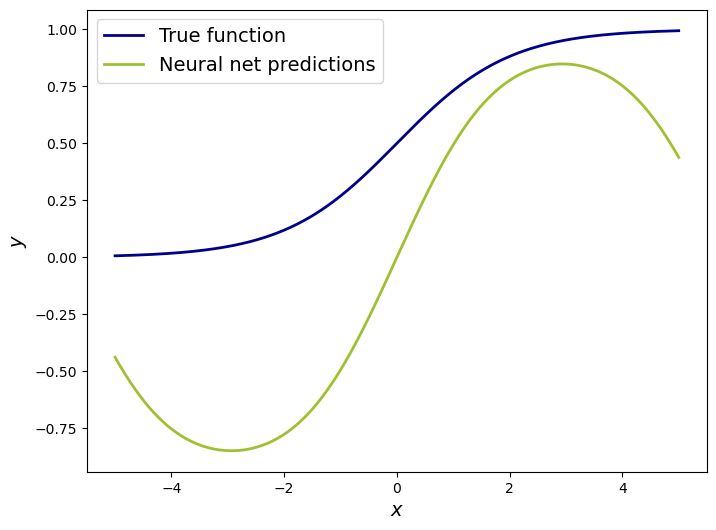

In [13]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

# Plot the true x and y values
ax.plot(x,y,label = 'True function',color='darkblue',linewidth=2)

# Plot the x values with the network predictions
h1,h2,y_pred = neural_network(W,x)
ax.plot(x,y_pred,label = 'Neural net predictions',color='#9FC131FF',linewidth=2)

# Set the x and y labels
ax.set_xlabel('$x$',fontsize=14)
ax.set_ylabel('$y$',fontsize=14)
ax.legend(fontsize=14);


In [20]:
### edTest(test_nn_mse) ###

# You can use the mean_squared_error function to find the MSE 
# of your predictions with true function values
h1,h2, y_pred = neural_network(W,x)
mse = mean_squared_error(y, y_pred)
print(f'The MSE of the neural network predictions wrt true function is {mse:.2f}')


The MSE of the neural network predictions wrt true function is 0.34


# Single update

### ⏸ What is $\frac{\partial L}{\partial w_2}$ from the options below: 

#### A. $\frac{1}{n}\sum_i^n2\left(y_{pred}\ -y\right)\cos\left(h_2\right)\sin\left(h_1\right)$
#### B. $\frac{1}{n}\sum_i^n2\left(y-y_{pred}\ \right)\cos\left(a_2\right)\sin\left(a_1\right)$
#### C. $\frac{1}{n}\sum_i^n2\left(y-y_{pred}\ \right)\sin\left(h_2\right)\sin\left(h_1\right)$
#### D. $\frac{1}{n}\sum_i^n2\left(y_{pred}\ -y\right)\cos\left(a_2\right)\sin\left(a_1\right)$

In [ ]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below 
# (eg. if you choose option C, put 'C')
answer2 = 'A'


In [22]:
# Here we will update the weights only once

# Get the predicted response, and the two affine transformations of 
# the network defined above
h1,h2,y_pred = neural_network(W,x)

# Compute the gradient of the loss function with respect to weight 2
dldw2 = np.mean(2*(y_pred - y)*np.cos(h2)*np.sin(h1))

# Now compute the gradient of the loss function with respect to weight 1
dldw1 = np.mean(2*(y_pred - y)*np.cos(h2)*W[1]*np.cos(h1)*x)


In [23]:
# In the update step, make sure to update the weights with their gradients
# Here we take a learning rate of 1
lr = 1
W[0] = W[0] - lr*dldw1
W[1] = W[1] - lr*dldw2


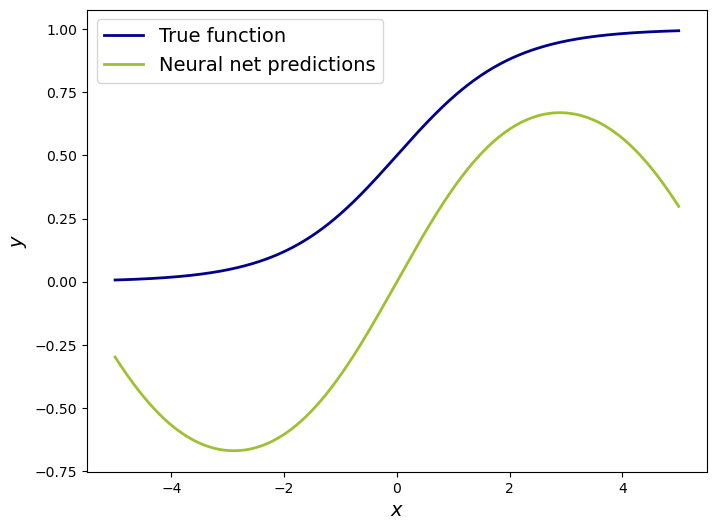

In [24]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

# Plot the true x and y values
ax.plot(x,y,label = 'True function',color='darkblue',linewidth=2)

# Plot the x values with the network predictions
h1,h2,y_pred = neural_network(W,x)
ax.plot(x,y_pred,label = 'Neural net predictions',color='#9FC131FF',linewidth=2)

# Set the x and y labels
ax.set_xlabel('$x$',fontsize=14)
ax.set_ylabel('$y$',fontsize=14)
ax.legend(fontsize=14);


In [25]:
### edTest(test_one_update_mse) ###

# Compute the new MSE after one update and print it
h1,h2,y_pred = neural_network(W,x)

# Calculate the mse using the new predicted y values 
mse_update = mean_squared_error(y, y_pred)
print(f'The MSE of the new neural network predictions with true function is {mse_update:.2f} as compared to {mse:.2f} from before ')


The MSE of the new neural network predictions with true function is 0.28 as compared to 0.34 from before 


# Several updates

In principle, only a single update will never be sufficient to improve model predictions.
In the below segment, use the method from above, and update the weight 300 times before plotting predictions.

Does your MSE decrease?

In [67]:
# Reinitialize the weights to start again 
np.random.seed(310)
W = [np.random.randn(1, 1), np.random.randn(1, 1)]


In [68]:
# Unlike the previous step, this time we will set a learning rate of 
# 0.01 to avoid drastic updates and run the above code for 300 loops

lmb = 0.01
for i in range(300):
    h1,h2,y_pred = neural_network(W,x)

    # Remember to use np.mean
    dldw2 = np.mean(2*(y_pred - y)*np.cos(h2)*np.sin(h1))
    dldw1 = np.mean(2*(y_pred - y)*np.cos(h2)*W[1]*np.cos(h1)*x)

    
    W[0] = W[0] - lmb * dldw1
    W[1] = W[1] - lmb * dldw2
    

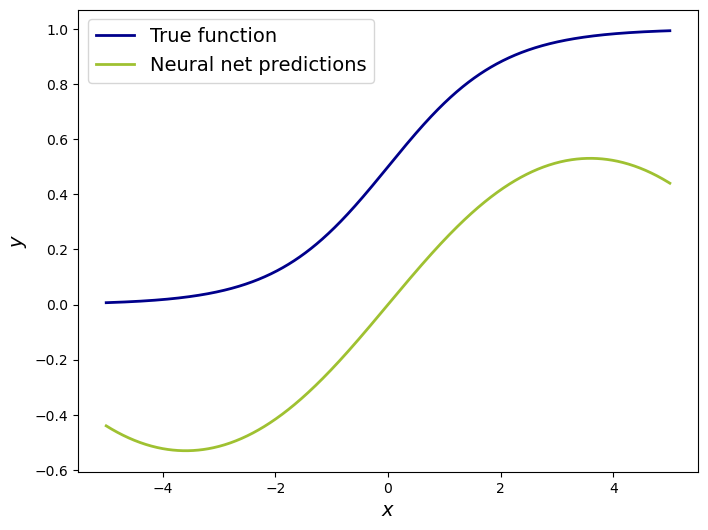

In [69]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

# Plot the true x and y values
ax.plot(x,y,label = 'True function',color='darkblue',linewidth=2)

# Plot the x values with the network predictions
h1,h2,y_pred = neural_network(W,x)
ax.plot(x,y_pred,label = 'Neural net predictions',color='#9FC131FF',linewidth=2)

# Set the x and y labels
ax.set_xlabel('$x$',fontsize=14)
ax.set_ylabel('$y$',fontsize=14)
ax.legend(fontsize=14);


In [70]:
### edTest(test_mse) ###

# We again compute the MSE and compare it with the original predictions
h1,h2,y_pred = neural_network(W,x)
mse_final = mean_squared_error(y,y_pred)

print(f'The final MSE is {mse_final:.2f} as compared to {mse:.2f} from before ')


The final MSE is 0.25 as compared to 0.34 from before 


# Mindchow 🍲

If you notice, your predicted values are off by approximately 0.5, from the actual values.
After marking, go back to your neural network and add a bias correction to your predictions of 0.5.
i.e `y = np.sin(h2) + 0.5` and rerun your code.

Does your code fit better? And does your $MSE$ reduce?

In [ ]:
### edTest(test_chow3) ###
# Type your answer within in the quotes given
answer3 = '___'
